In [1]:
#-------------------------- Standard Imports --------------------------#
%reload_ext autoreload
%autoreload 2
import kdephys as kde
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import acr
import tdt
# ---------------------------- EXTRAS --------------------------------#

/home/kdriessen/miniconda3/envs/offdet/lib/python3.10/site-packages/neurodsp/__init__.py:5: FutureWarning: neurodsp has been renamed to ibldsp and the old name will be deprecated on 01-Sep-2024.
  warn(


In [2]:
subject = 'ACR_33'
exp = 'swi'
store = 'Pu1_'

In [12]:
ton, toff = acr.stim.get_pulse_train_times(subject, exp, store)
pon, poff = acr.stim.get_individual_pulse_times(subject, exp, store)

In [25]:
pon = [pd.Timestamp(on) for on in pon]
poff = [pd.Timestamp(off) for off in poff]

In [28]:
durations = []
for tstart, tstop in zip(ton, toff):
    train_on_times = pon[tstart:(tstop+1)]
    train_off_times = poff[tstart:(tstop+1)]
    durs = [(train_off_times[i] - train_on_times[i]).total_seconds() for i in range(len(train_on_times))]
    durations.append(durs)

In [34]:
total_on_times = [sum(durs) for durs in durations]

# Regression

In [ ]:
train_knobs = [5.8, 6.0, 6.1, 6.2, 6.2, 6.2]

In [51]:
ferrule = 'f39'
ferrule_knobs = [4.0, 4.4, 5.0, 5.7, 6.7]
ferrule_powers = [.064, .098, .274, .460, .706]

 y = 0.24784908933217686 * x + -0.9585013009540326


Text(5, 0.2, ' y = 0.24784908933217686 * x + -0.9585013009540326')

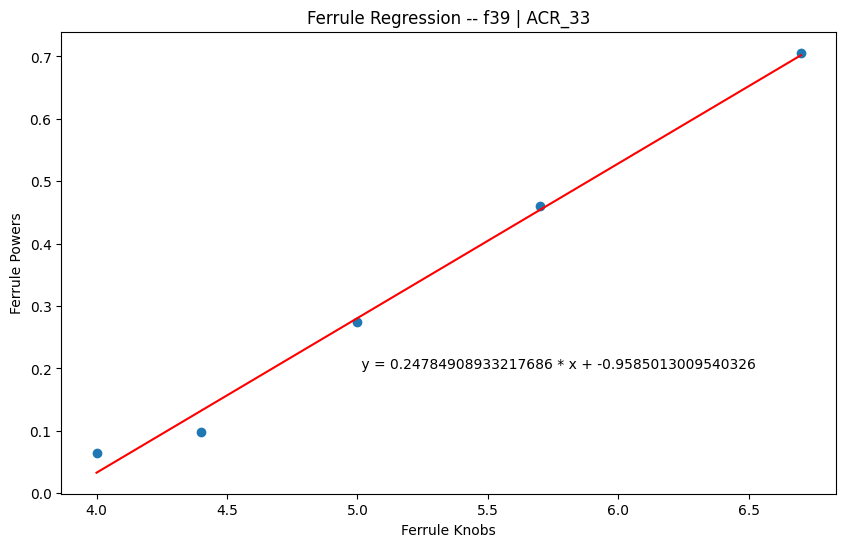

In [60]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
regression_model = LinearRegression()

# Fit the model to the data
X = np.array(ferrule_knobs).reshape(-1, 1)
y = np.array(ferrule_powers)
regression_model.fit(X, y)

# Predict the values
y_pred = regression_model.predict(X)

f, ax = plt.subplots(1, 1, figsize=(10, 6))
# Plot the data and the regression line
ax.scatter(ferrule_knobs, ferrule_powers)
ax.plot(ferrule_knobs, y_pred, color='red')
ax.set_xlabel('Ferrule Knobs')
ax.set_ylabel('Ferrule Powers')
ax.set_title(f'Ferrule Regression -- {ferrule} | {subject}')


#get the equation of the line
m = regression_model.coef_[0]
b = regression_model.intercept_
ax.text(5, .2, ' y = {0} * x + {1}'.format(m, b))


In [45]:
def ferrule_regression(m, b, x):
    return m*x + b

In [62]:
total_powers = []
for i, knob in enumerate(train_knobs):
    power = ferrule_regression(m, b, knob)
    on_time = total_on_times[i]
    print(f'On Time: {on_time} | Power: {power} | Knob: {knob}')
    total_pow = on_time * power
    total_powers.append(total_pow)

On Time: 108.19141900000074 | Power: 0.4790234171725931 | Knob: 5.8
On Time: 168.14120100000233 | Power: 0.5285932350390286 | Knob: 6.0
On Time: 90.0846829999994 | Power: 0.553378143972246 | Knob: 6.1
On Time: 72.0745939999994 | Power: 0.578163052905464 | Knob: 6.2
On Time: 1.759867999999999 | Power: 0.578163052905464 | Knob: 6.2
On Time: 2.79979 | Power: 0.578163052905464 | Knob: 6.2


In [68]:
complete_stim_integral = sum(total_powers)

In [69]:
complete_stim_integral

234.862512390385

In [70]:
def find_duration_at_knob(m, b, knob, integral_to_match):
    power_at_knob = ferrule_regression(m, b, knob)
    return integral_to_match / power_at_knob

In [82]:
find_duration_at_knob(m, b, 8.0, complete_stim_integral)

229.29266930123586

In [84]:
ferrule_regression(m, b, 8)

1.0242914137033823

3.816666666666667

In [73]:
ferrule_regression(m, b, 7.0)

0.7764423243712055